In [448]:
import pandas as pd
import numpy as np
from math import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [449]:
df=pd.read_csv('uber.csv')
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [450]:
df.drop(['Unnamed: 0','key'],axis=1,inplace=True)
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [451]:
df.info

<bound method DataFrame.info of         fare_amount          pickup_datetime  pickup_longitude  \
0               7.5  2015-05-07 19:52:06 UTC        -73.999817   
1               7.7  2009-07-17 20:04:56 UTC        -73.994355   
2              12.9  2009-08-24 21:45:00 UTC        -74.005043   
3               5.3  2009-06-26 08:22:21 UTC        -73.976124   
4              16.0  2014-08-28 17:47:00 UTC        -73.925023   
...             ...                      ...               ...   
199995          3.0  2012-10-28 10:49:00 UTC        -73.987042   
199996          7.5  2014-03-14 01:09:00 UTC        -73.984722   
199997         30.9  2009-06-29 00:42:00 UTC        -73.986017   
199998         14.5  2015-05-20 14:56:25 UTC        -73.997124   
199999         14.1  2010-05-15 04:08:00 UTC        -73.984395   

        pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0             40.738354         -73.999512         40.723217                1  
1             4

In [452]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [453]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [454]:
df.tail()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [455]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [456]:
df['dropoff_longitude']=df['dropoff_longitude'].fillna(df['dropoff_longitude'].mean())
df['dropoff_latitude']=df['dropoff_latitude'].fillna(df['dropoff_latitude'].mean())

In [457]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [458]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [459]:
def distance_transform(longitude1,longitude2,latitude1,latitude2):
    distance=[]
    for pos in range(len(longitude1)):
        long1,long2,lat1,lat2=map(radians,[longitude1[pos],longitude2[pos],latitude1[pos],latitude2[pos]])
        diff_long=long2-long1
        diff_lat=lat2-lat1
        a=sin(diff_lat/2)**2 + cos(lat1)*cos(lat2)*cos(diff_long/2)**2
        b=2*6371*acos(a)
        distance.append(b)
    return distance
                

In [460]:
df["distance_km"]=distance_transform(df["pickup_longitude"].to_numpy(),df["dropoff_longitude"].to_numpy(),df["pickup_latitude"].to_numpy(),df["dropoff_latitude"].to_numpy())

In [461]:
#learn
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'],errors='coerce')

In [462]:
df=df.assign(pickup_hr=df['pickup_datetime'].dt.hour,pickup_day=df['pickup_datetime'].dt.day,pickup_month=df['pickup_datetime'].dt.month,pickup_year=df['pickup_datetime'].dt.year,pickup_dayofweek=df['pickup_datetime'].dt.dayofweek)

In [463]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hr,pickup_day,pickup_month,pickup_year,pickup_dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,12221.173788,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,12223.454269,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,12228.137897,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,12238.981417,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,12227.052549,17,28,8,2014,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,12223.603884,10,28,10,2012,6
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,12223.173497,1,14,3,2014,4
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,12219.506361,0,29,6,2009,0
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,12215.706379,14,20,5,2015,2


In [464]:
#learn
df.drop(df[df['distance_km']==0].index,inplace=True)
df.drop(df[df['fare_amount']>100].index,inplace=True)
df.drop(df[df['fare_amount']<0].index,inplace=True)
df.drop(df[df['distance_km']>60].index,inplace=True)
df.drop(df[df['passenger_count']>6].index,inplace=True)
#df.drop(['Unnamed: 0','key','day_name'],axis=1,inplace=True)

<Axes: >

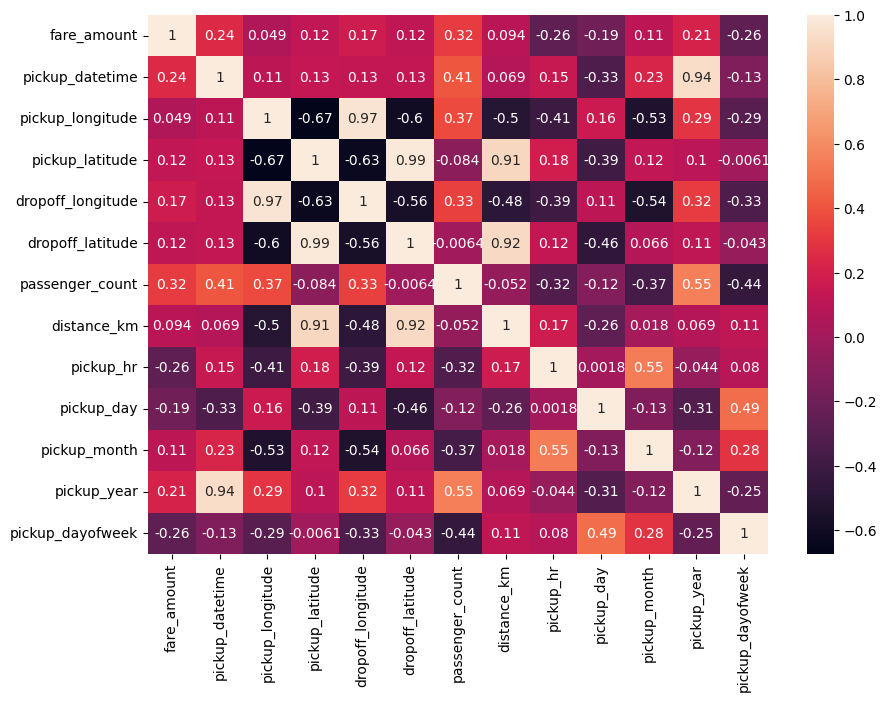

In [465]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

In [466]:
def find_outliers(df):
    q1=df.quantile(0.25)
    q2=df.quantile(0.75)
    iqr=q2-q1
    outliers=df[(df<(q1-1.5*iqr)) | (df>(q2+1.5*iqr))]
    return outliers

In [467]:
outlier=find_outliers(df['fare_amount'])
print(len(outlier))
print(outlier.max())
print(outlier.min())


2
29.07
25.3


In [468]:
y=df['fare_amount']
x=df[['pickup_year','distance_km']]

In [469]:
scale=StandardScaler()

In [470]:
x=scale.fit_transform(x)

In [471]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [472]:
model=LinearRegression()

In [473]:
model.fit(x_train,y_train)

LinearRegression()

In [474]:
y_pred=model.predict(x_test)
y_pred

array([11.07355729, 18.35817904, 11.07228985])

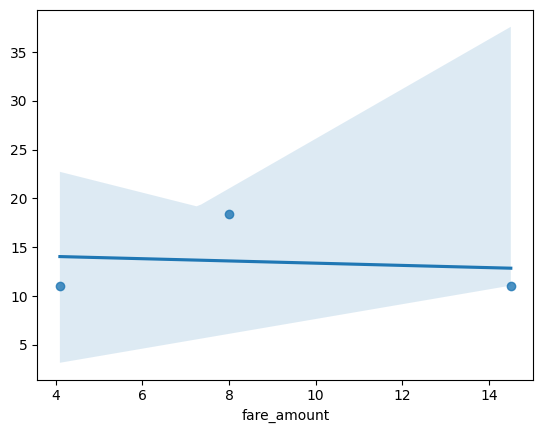

In [475]:
sns.regplot(x=y_test,y=y_pred)
plt.show()

In [478]:
model=RandomForestRegressor()

In [479]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [480]:
y_pred=model.predict(x_test)

<Axes: xlabel='fare_amount'>

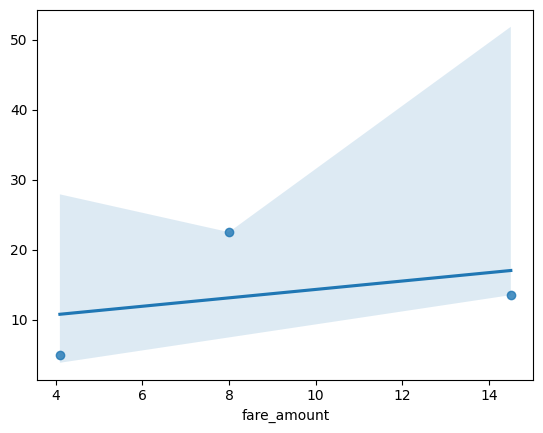

In [481]:
sns.regplot(x=y_test,y=y_pred)

In [483]:
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.mean_absolute_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

70.99905165333327
5.44586666666666
8.42609349896696
